# Question 1

In this part of the assesment, we are going to load and preprocess the data. Then we will work with 2 text classifiers and will finalise the one which will fit oyr model best. The topics are given and we need to assign these topics to our dataset and update our existing dataset. The dataset is unsupervised in nature. 

In [233]:
# Importing all the necessary libraries
import os
import numpy as np
import pandas as pd

In [234]:
# Loading the dataset and converting it to dataframe.
# The original dataset consistes of around 800,000 records, but we are taking 200,000 for our processing.
df = pd.read_csv("../AI2/quora_questions.csv", nrows=200000)

In [235]:
df.head()

,question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


In [236]:
df.tail()

,question
199995,Why was the Battle of Vimy Ridge so important?
199996,Which of these TV shows should I watch next?
199997,Should I change my name?
199998,Should I buy the new MacBook 2016 or one from ...
199999,What is your review of Love (2011 movie)?


In [237]:
# Checking if there are any null values in the dataset
df.isnull()

,question
0,False
1,False
2,False
3,False
4,False
...,...
199995,False
199996,False
199997,False
199998,False


In [238]:
# A "1" indicates missing value, and "0" indicates no missing value
df.isnull().sum()

question    0
dtype: int64

As above, 'question' is represented by '0', so it shows that there are no null values in our data.

In [239]:
# Shows the length of dataset we are using for our processing.
len(df)

200000

There are 200000 questions in our dataset available for processing. And this all is held in a dataframe which I have just created above

In [240]:
df["question"].value_counts()

How do I improve my pronunciation of English?                                          25
How do i lose weight?                                                                  25
How does banning 500 and 1000 rupee notes help to control black money?                 24
Why do people ask questions on Quora that are easily to find answers too on Google?    24
How do I improve my English speaking?                                                  24
                                                                                       ..
What are Hillary Clinton's favorite sports teams and athletes?                          1
Can black mold kill you?                                                                1
Who is the creator of Quotev.com?                                                       1
Which Pakistani movies deserve to win an Oscar?                                         1
What are the differences between Daisy and Myrtle?                                      1
Name: ques

In [241]:
# Describing the dataset 
df["question"].describe()

count                                            200000
unique                                           160510
top       How do I improve my pronunciation of English?
freq                                                 25
Name: question, dtype: object

In [242]:
# Printing the question that is present at a specific number in our dataset, say at '2000' 
print(df["question"][2000])

How do I break security code in Nokia 103?


I will use two text classifiers for our data. First, I will be using Latent Dirichlet Allocation(LDA) classifier to cluster the most popular words and assign them with appropiate topics.
    Before moving to that, I will first preprocess the data available using the scikit-learn count vectorizer library and its text feature_exttraction ability to remove all the common words that occur frequently in the data. And I will make sure that we have words that meet minimum frequency within the dataset. Also, all of english stop words will be removed from the data as a part of preprocessing. This will convert the data to a format which is supported by machine learning algorithms

In [326]:
from sklearn.feature_extraction.text import CountVectorizer

Now, an instance of CountVectorizer will be initialised as "count_vect". While intiliasing, we need to take into account 2 parameters, one is 'max_df' and other is 'min_df'. 

'max_df'- when building the vocabulary we need to ignore terms that have a frequency strictly higher than the given threshold. It is also known as 'corpus specific stopwords'. The range can be a float from 0.0 to 1.0 or an integer and the default is 1.0. The parameter is ignored if the vocabulary is not None. In our model, we have set max_df=0. As this is a float, so the parameter represents  a proportion of words , inteher absolute counts.

'min_df'- when building the vocabulary, we need to ignore terms that have a frequency strictly lower than the given threshold. It is also known as 'cut off' in literature. The range can be a float from 0.0 to 1.0 or an interger and by default, it is 1.0. In our model, we have set min_df=4. If float, the paameter represents a proportion of words, integer absolute counts.

This all depends on us, as we can reduce this number if we want more common words to appear in our questions.

Also, a stop_words command is added through which we can remove all our stop words. We have used 'english' based on our corpus.

In [327]:
# min_df is set to 4 to ensure that word can be detected in at least 4 questions from our dataset. 
count_vect = CountVectorizer(max_df=0.90, min_df=7, stop_words="english")

As the dataset is unsupervised, so there is no need to split the data into train and test. There is no need to train the model as it is unsupervised. The main aim is to categorize the data. Instead, we use a fit_trasfor function on the entire dataset. It will fit the data to the model and then transorm it for further processing.

In [328]:
doc_term_matrix = count_vect.fit_transform(df["question"])

In [329]:
doc_term_matrix

<200000x12293 sparse matrix of type '<class 'numpy.int64'>'
	with 932743 stored elements in Compressed Sparse Row format>

As above, we have creted a Document Term Matrix(DTM) which is a sparse matrix of words in all our dataset. The above dtm shows that it contains 200000 questions(rows) with 17377 terms(words). We can increase or decrese the dtm by adjusting the max_df and min_df. 

In [330]:
from sklearn.decomposition import LatentDirichletAllocation

In [331]:
lda = LatentDirichletAllocation(n_components=13, random_state=1)

In [332]:
lda.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=13, n_jobs=None,
                          perp_tol=0.1, random_state=1, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [333]:
print("Log Likelihood", lda.score(doc_term_matrix))

Log Likelihood -7725691.639139945


In [334]:
print("Perplexity", lda.perplexity(doc_term_matrix))

Perplexity 3141.0405632447782


In [335]:
#from sklearn.model_selection import GridSearchCV

# Define Search Param
#search_params = {'n_components': [5, 7, 9, 11, 13], 'learning_decay': [.5, .7, .9]}

# Init the Model
#lda_comparison = LatentDirichletAllocation()

# Init Grid Search Class
#lda_comparison = GridSearchCV(lda_comparison, param_grid=search_params)

# Do the Grid Search
#lda_comparison.fit(doc_term_matrix)

In [336]:
# Best Model which gave highest score 
# best_lda_model = lda_comparison.best_estimator_

# Model Parameters is used to store a list of parameter settings dicts for all the parameter candidates
# print("Best Model's Params: ", lda_comparison.best_params_)

# Log Likelihood Score
#print("Best Log Likelihood Score: ", lda_comparison.best_score_)

# Perplexity
#print("Model Perplexity: ", best_lda_model.perplexity(doc_term_matrix))

Word Vocab

In [337]:
len(count_vect.get_feature_names())

12293

In [338]:
count_vect.get_feature_names()[805]

'anytime'

In [339]:
lda.components_

array([[7.69231397e-02, 7.69233040e-02, 6.79257442e+00, ...,
        7.69232780e-02, 7.69232780e-02, 7.69248532e-02],
       [7.69232629e-02, 7.69231900e-02, 7.69236639e-02, ...,
        7.69230769e-02, 7.69230769e-02, 7.69230769e-02],
       [7.69232255e-02, 7.69232452e-02, 7.69233531e-02, ...,
        7.69230769e-02, 7.69230769e-02, 4.75084543e+00],
       ...,
       [7.69233158e-02, 7.69231978e-02, 7.69232565e-02, ...,
        7.69236978e-02, 7.69232526e-02, 4.40299715e+00],
       [2.40769211e+01, 3.82076819e+02, 7.69247171e-02, ...,
        7.69234392e-02, 7.69234392e-02, 7.69230769e-02],
       [7.69231959e-02, 7.69231613e-02, 7.69232856e-02, ...,
        7.69230769e-02, 7.69230769e-02, 7.69230769e-02]])

In [340]:
lda.components_.shape

(13, 12293)

In [341]:
first_topic = lda.components_[0]

In [342]:
first_topic.argsort()

array([ 5470,  8458,  5810, ...,  8538,  3513, 11395], dtype=int64)

In [343]:
len(first_topic.argsort())

12293

In [344]:
len(first_topic.argsort()), type(first_topic.argsort())

(12293, numpy.ndarray)

In [345]:
first_topic.argsort()[17:]

array([10723,  4086, 11681, ...,  8538,  3513, 11395], dtype=int64)

In [347]:
print(count_vect.get_feature_names()[127])

2025


In [348]:
import matplotlib.pyplot as plt
def show_bar(words, count, bar_title):
    d = pd.DataFrame({"Words": word_list, "Count": probability_list})
    # Sorting the DataFrame by largest count
    d = d.sort_values(by=["Count"], ascending=False)
    ax = d.plot.bar(y = "Count", x = "Words", title = bar_title, figsize = (15, 10), legend = True, fontsize = 13, rot = 1, edgecolor="red")
    ax.set_xlabel("Frequent Words", fontsize=13)
    ax.set_ylabel("Word Count", fontsize=13)
    

great
usa
bank
salary
god
election
america
states
united
happen
average
india
2016
win
hillary
clinton
did
president
donald
trump


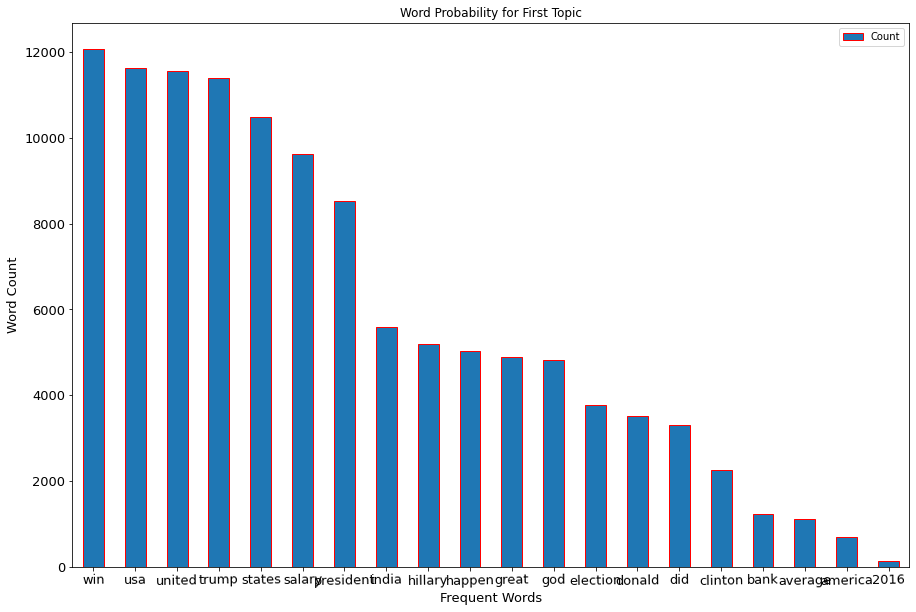

In [349]:
word_list = []
probability_list = []

for index in first_topic.argsort()[-20:]:
    frequent_word = count_vect.get_feature_names()[index]
    print(frequent_word, sep=" ")
    word_list.append(frequent_word)
    probability_list.append(index)
    
show_bar(word_list, probability_list, "Word Probability for First Topic")

Top 15 Words for topic 0 are: 
['election']['america']['states']['united']['happen']['average']['india']['2016']['win']['hillary']['clinton']['did']['president']['donald']['trump']

Top 15 Words for topic 1 are: 
['writing']['class']['best']['learning']['increase']['skills']['english']['exam']['person']['study']['business']['prepare']['examples']['improve']['start']

Top 15 Words for topic 2 are: 
['human']['sleep']['air']['facts']['cause']['exist']['dark']['support']['universe']['bad']['rid']['work']['energy']['long']['does']

Top 15 Words for topic 3 are: 
['answers']['youtube']['meaning']['tv']['use']['google']['ask']['answer']['word']['instagram']['question']['does']['used']['questions']['quora']

Top 15 Words for topic 4 are: 
['center']['good']['interview']['food']['big']['process']['tips']['people']['visit']['places']['makes']['making']['men']['women']['job']

Top 15 Words for topic 5 are: 
['delhi']['car']['programming']['read']['better']['language']['movies']['book']['books'][

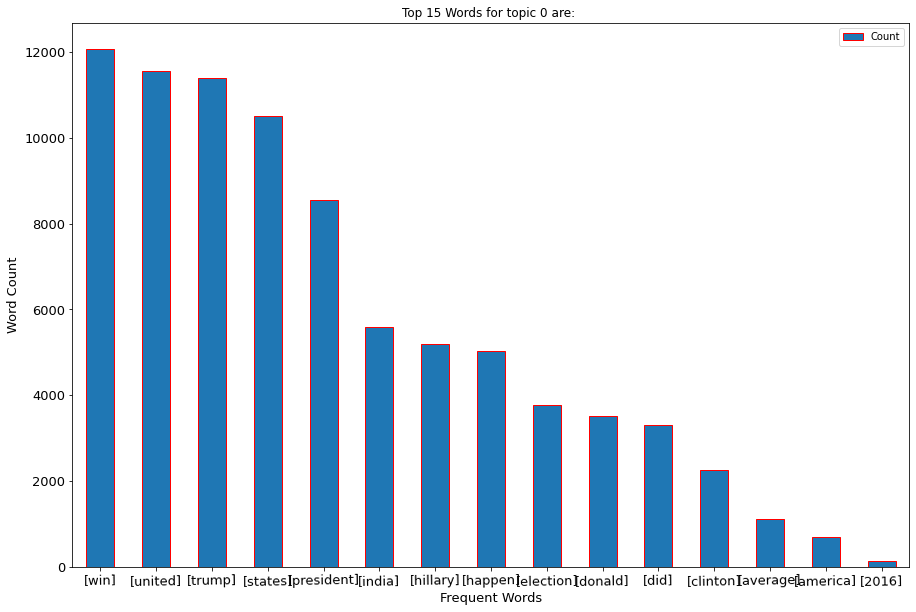

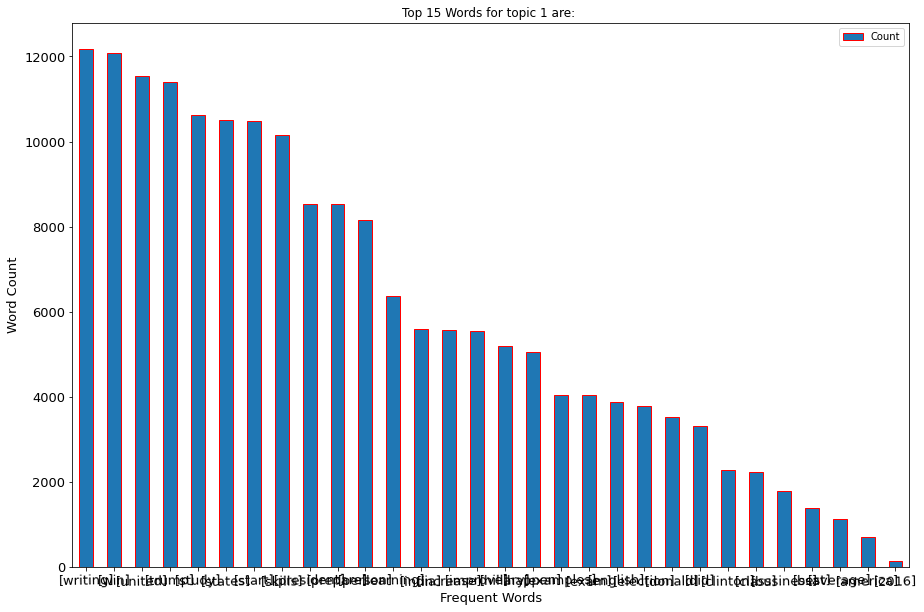

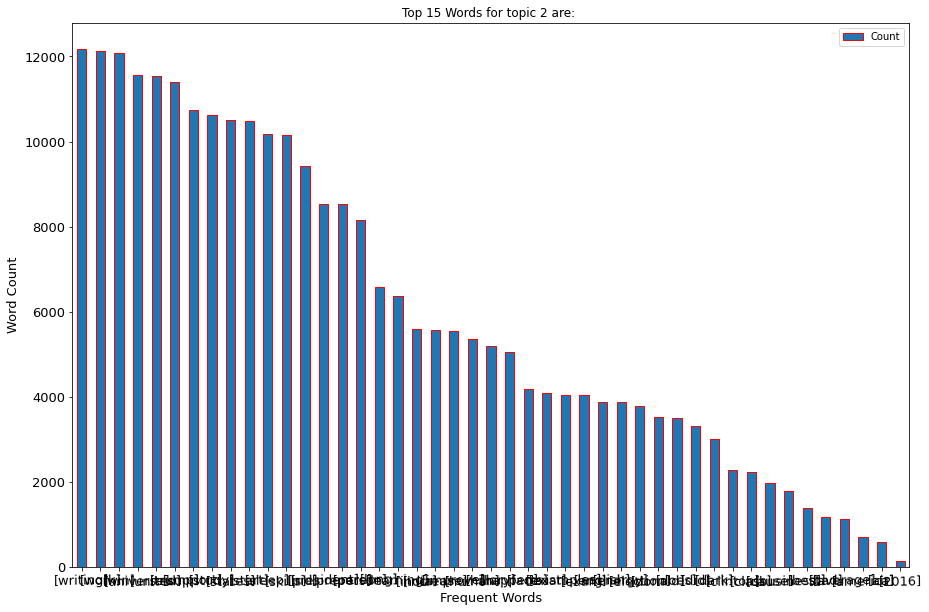

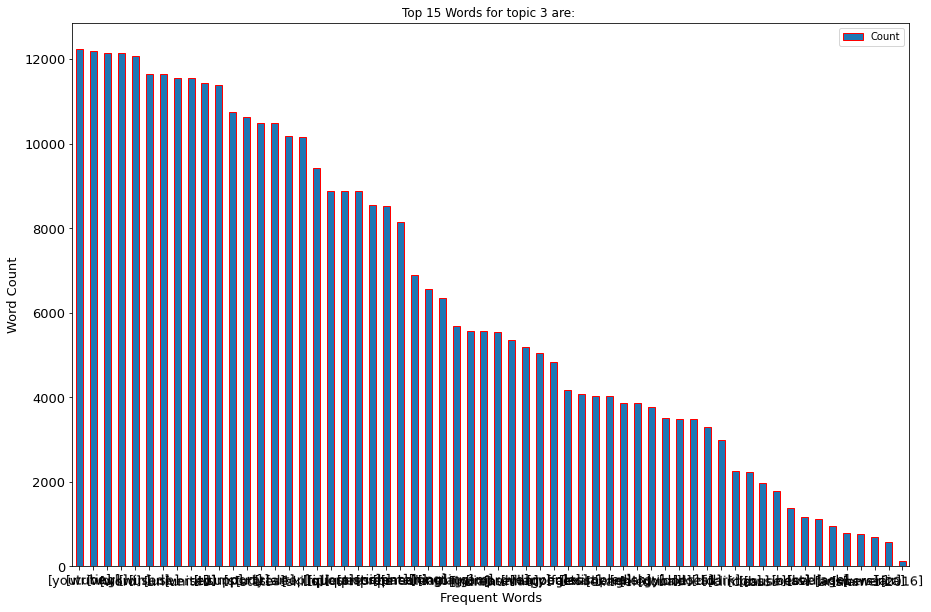

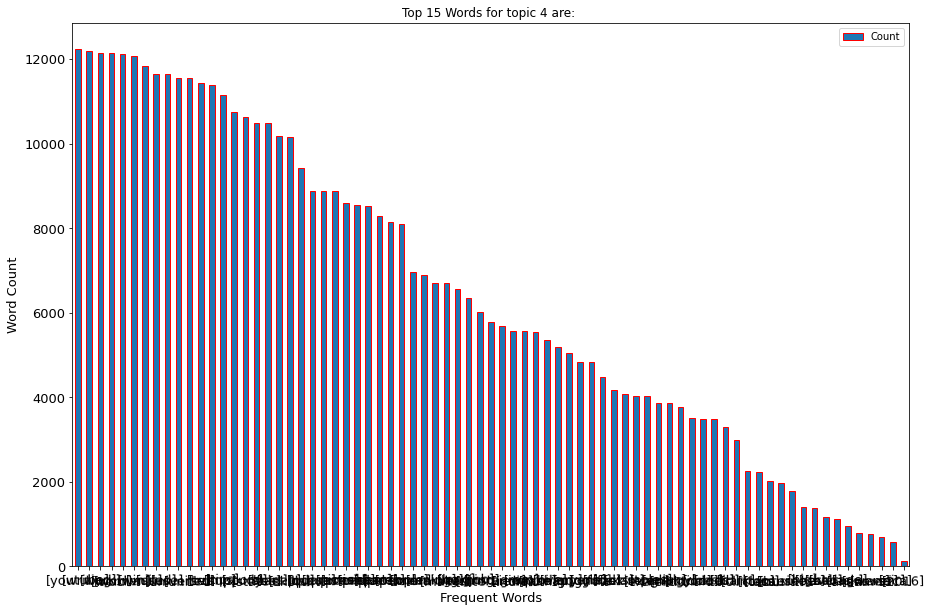

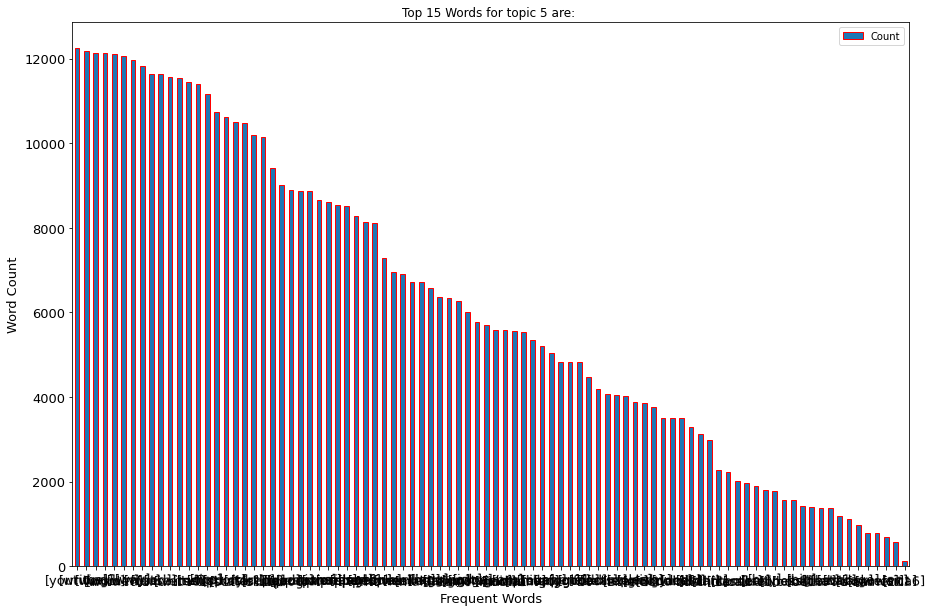

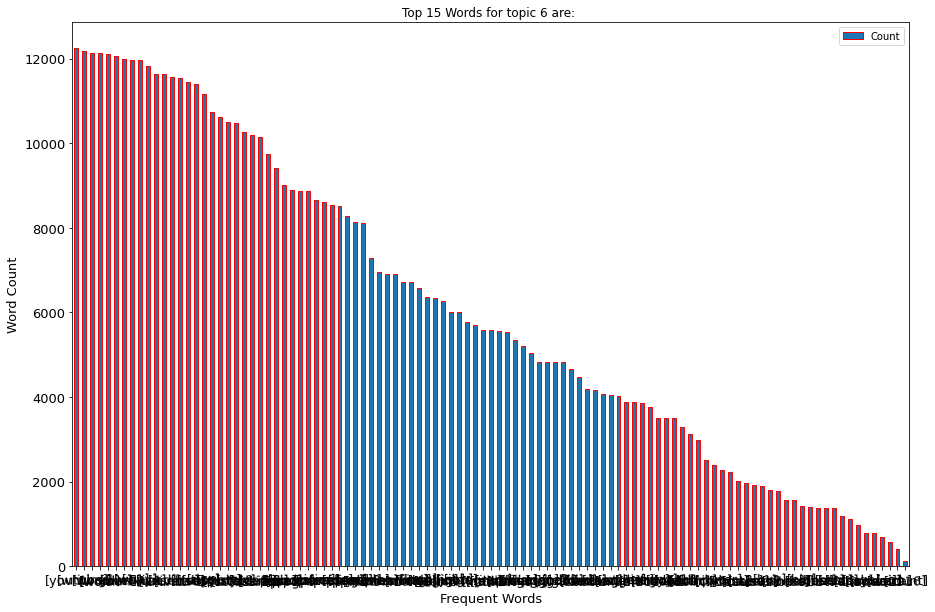

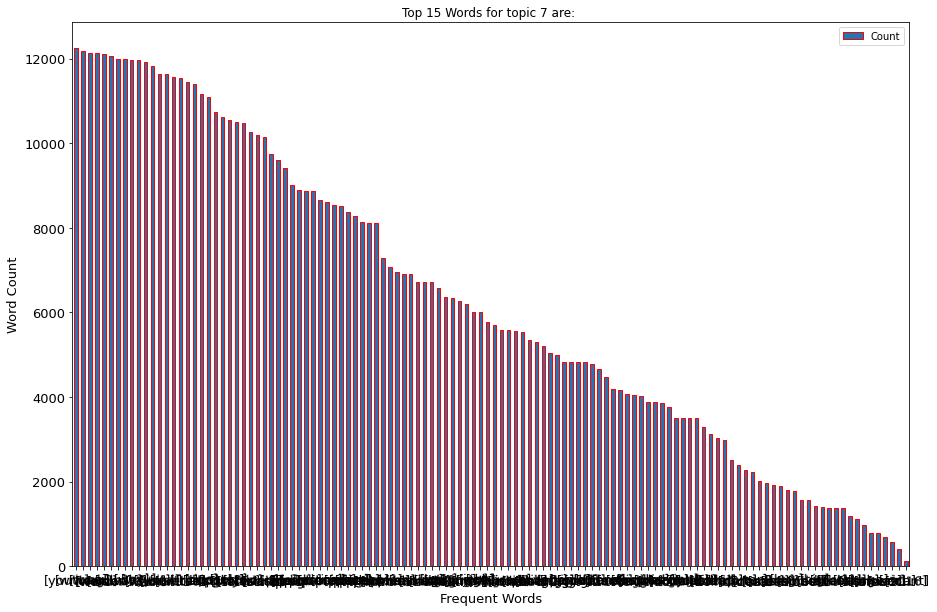

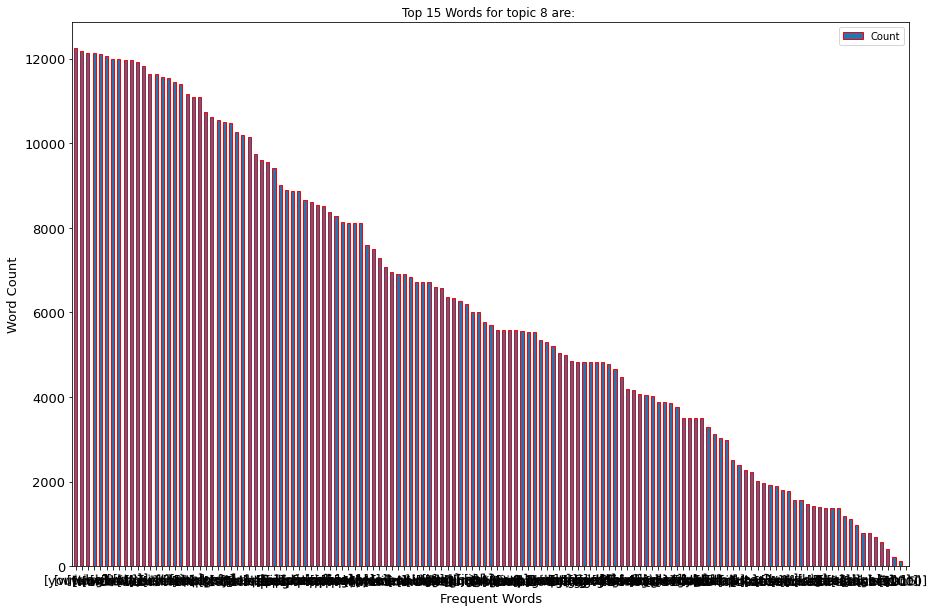

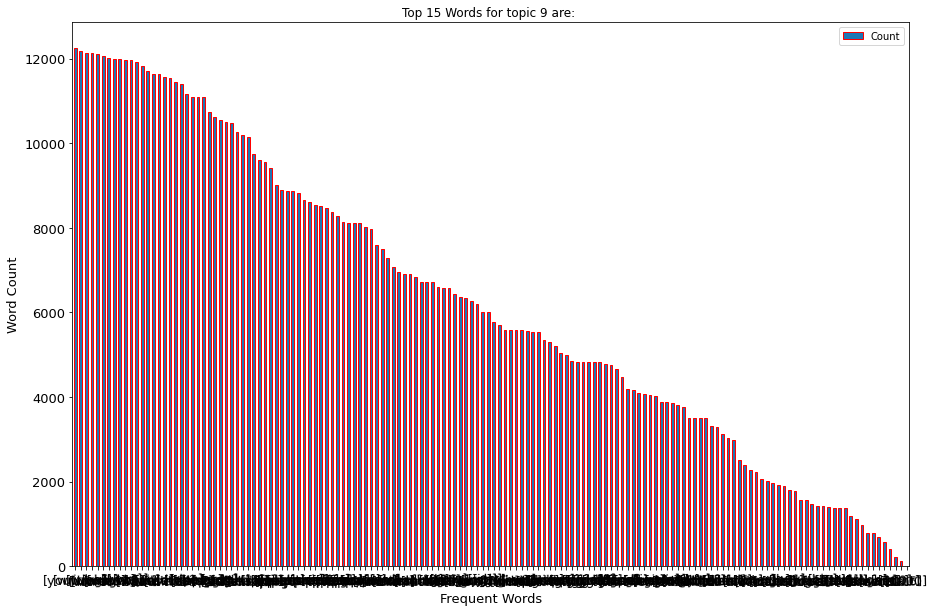

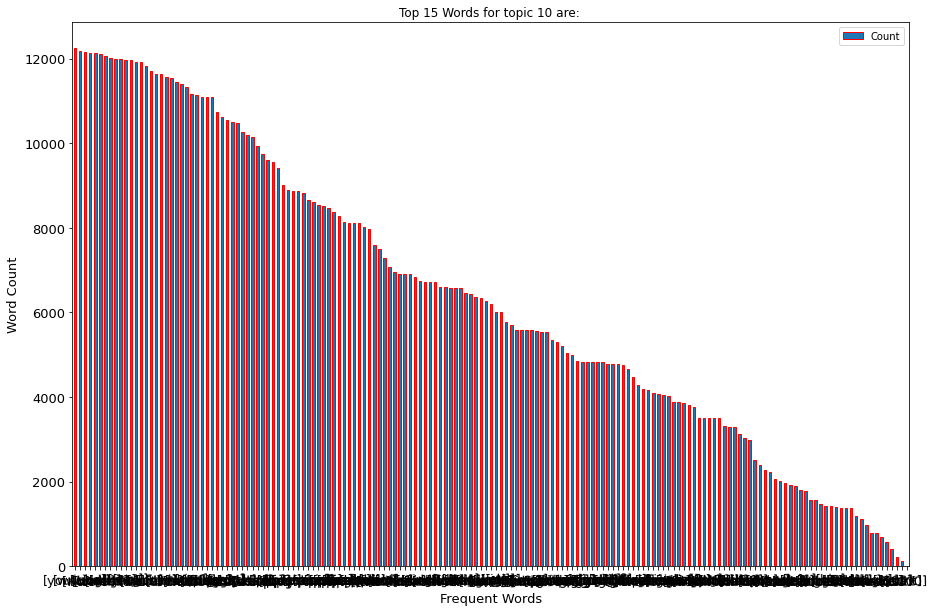

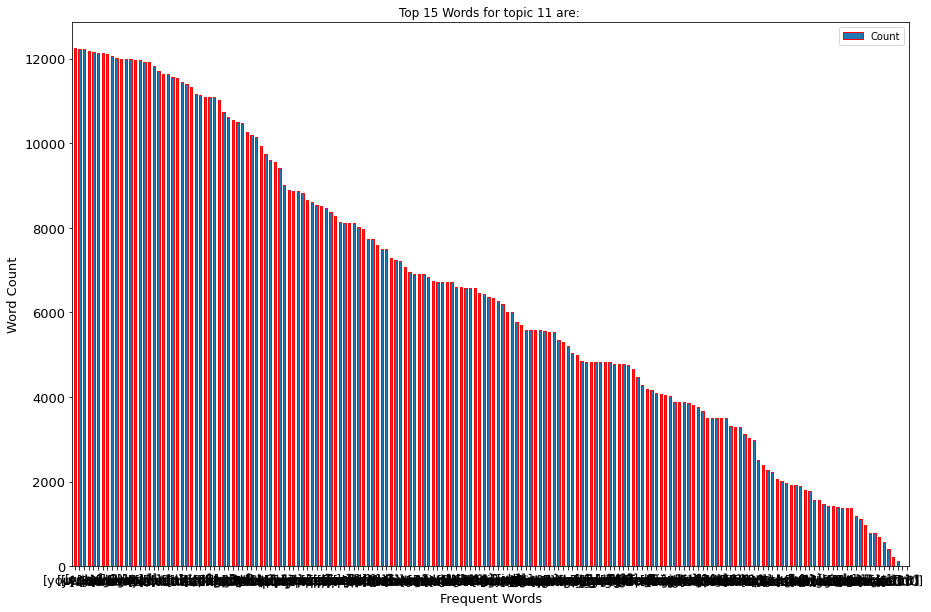

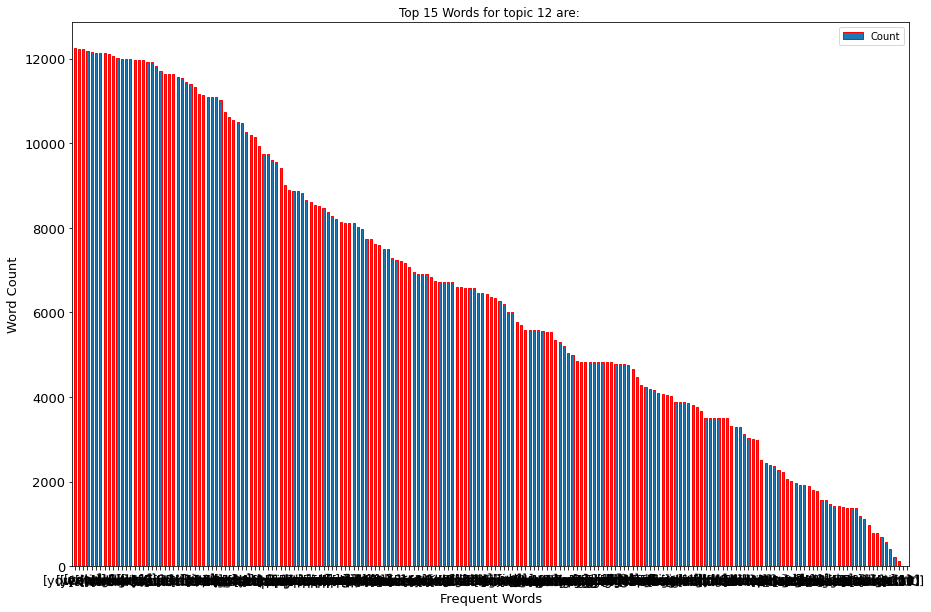

In [350]:
word_list = []
probability_list = []

top_number = 15
count = 0

for prob_num in lda.components_:
    question = f"Top 15 Words for topic {count} are: "
    print(question)
    for number in prob_num.argsort()[-top_number:]:
        print([count_vect.get_feature_names()[number]], end= "")
        word_list.append([count_vect.get_feature_names()[number]])
        probability_list.append(number)
    show_bar(word_list, probability_list, question)
    print("\n")
    count += 1



In [351]:
top_number = 50
count = 0

for prob_num in lda.components_:
    print(f"Top 25 words for topic {count} are: ")
    for number in prob_num.argsort()[-top_number:]:
        print([count_vect.get_feature_names()[number]], end="")
    print("\n")
    count += 1

Top 25 words for topic 0 are: 
['difference']['presidency']['temperatures']['elections']['cold']['pay']['macbook']['students']['north']['political']['better']['tax']['rate']['party']['run']['good']['international']['pro']['desert']['won']['war']['compare']['ones']['called']['vote']['think']['american']['presidential']['say']['state']['great']['usa']['bank']['salary']['god']['election']['america']['states']['united']['happen']['average']['india']['2016']['win']['hillary']['clinton']['did']['president']['donald']['trump']

Top 25 words for topic 1 are: 
['preparing']['intelligence']['try']['want']['crack']['small']['paper']['level']['communication']['gate']['ideas']['board']['significance']['hours']['ways']['wear']['exams']['way']['blog']['marks']['ias']['iit']['jee']['2017']['preparation']['speak']['battle']['people']['cat']['2016']['did']['machine']['good']['score']['write']['writing']['class']['best']['learning']['increase']['skills']['english']['exam']['person']['study']['business'][

Add topic number to original dataframe

In [352]:
question_topics = lda.transform(doc_term_matrix)


In [353]:
question_topics

array([[0.00961548, 0.00961545, 0.0096154 , ..., 0.00961539, 0.31402365,
        0.00961544],
       [0.01538462, 0.01538468, 0.81538404, ..., 0.01538466, 0.01538463,
        0.01538462],
       [0.01098901, 0.16058323, 0.01098911, ..., 0.17175668, 0.01098919,
        0.55776914],
       ...,
       [0.03846169, 0.03846154, 0.03846169, ..., 0.03846166, 0.03846154,
        0.03846194],
       [0.5051015 , 0.01282064, 0.01282051, ..., 0.0128206 , 0.01282074,
        0.01282051],
       [0.01538472, 0.01538462, 0.01538462, ..., 0.61528075, 0.01538466,
        0.01538462]])

In [354]:
question_topics[1]

array([0.01538462, 0.01538468, 0.81538404, 0.01538488, 0.01538469,
       0.01538469, 0.01538462, 0.01538463, 0.01538462, 0.01538462,
       0.01538466, 0.01538463, 0.01538462])

In [355]:
question_topics.shape

(200000, 13)

In [356]:
question_topics[1].argmax()

2

In [357]:
examined_question = lda.components_[7]

In [358]:
for index in examined_question.argsort()[-100:]:
    print(count_vect.get_feature_names()[index], end=" ")

cream change lord teeth functions hill quora driving birthday procedure analysis career decide feelings domain ticket cancer information successful quickly cells say company content relationship doing psychology topic license strong plant bad really exist help popular technology doesn internet main driver writer left cheating coffee animals station harassment think partner talk husband public staff unmarried contact grow friend difference feeling easily reasons moral couples need did traffic products thinking boyfriend good blowing feel future uber family just india ex friends function cell famous right wrong make girlfriend hotel deal police mind safe hair want things website stop know don people 

In [359]:
print(df["question"][199999])

What is your review of Love (2011 movie)?


In [360]:
topic_list = []

for popular_index_pos in question_topics:
    topic_list.append(popular_index_pos.argmax())
    
df["Topic Number"] = topic_list

In [361]:
df.head(60)

,question,Topic Number
0,What is the step by step guide to invest in sh...,6
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,2
2,How can I increase the speed of my internet co...,12
3,Why am I mentally very lonely? How can I solve...,7
4,"Which one dissolve in water quikly sugar, salt...",12
5,Astrology: I am a Capricorn Sun Cap moon and c...,2
6,Should I buy tiago?,5
7,How can I be a good geologist?,5
8,When do you use ã‚· instead of ã—?,12
9,Motorola (company): Can I hack my Charter Moto...,6


In [ ]:
topic_list = {0:
              1:
              2:
              3:
              4:
              5:
              6:
              7:
              8:
              9:
              10:
              11:
              12:
              13:    
}